## Imports

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from diversity import Metacommunity

np.random.seed(42)

## Image sources

- Emojis: Apple standard
- Penguins: http://clipart-library.com/clipart/1750373.htm

## Functions

In [2]:
def species_freq(y, outfile, figsize = (4, 2), linewidth = 3):
    x = list(range(len(y)))
    plt.figure(figsize=figsize)
    plt.bar(x, y, linewidth=linewidth, edgecolor="#000", facecolor="#eee")
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_linewidth(3) # set_visible(True)
    plt.ylim(0, 31)
    plt.savefig(outfile, transparent=True)
    return

def D1(y):
    tot = sum(y)
    P = [i/tot for i in y]
    return np.exp(-sum([i*np.log(i) for i in P]))

def similarity_matrix(S, outfile, scale=1, cmap="bone_r"):
    S = S**scale                    # if values are too close to 1, scale makes it easier to see differences
    figsize = (len(S), len(S))
    plt.figure(figsize=figsize)
    ax = sns.heatmap(S, cmap=cmap, cbar=False, vmin=0., vmax=1.)
    ax.axhline(y=0, color='k', linewidth=3)
    ax.axvline(x=0, color='k', linewidth=3)
    ax.axhline(y=len(S), color='k', linewidth=3)
    ax.axvline(x=len(S), color='k', linewidth=3)
    _ = plt.tight_layout()
    _ = plt.xticks([])
    _ = plt.yticks([])
    _ = plt.tight_layout()
    _ = plt.savefig(outfile, transparent=True)
    _ = plt.show()
    return

## Figure 1: Illustrates the effect of frequency on diversity

This section goes with Fig. 1 from the manuscript.

The icons are all standard Apple emojis. We generate the species-frequency distributions as follows.

### Community 1a (mostly apples)

1.896549191899248

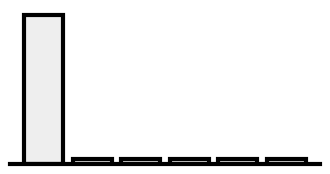

In [3]:
y1 = [30, 1, 1, 1, 1, 1]
species_freq(y1, outfile="fig1_community1a_apples_species_freq_distr.pdf"); D1(y1)

### Community 1b (all fruits)

5.98726389483273

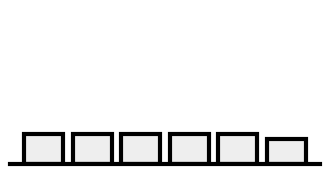

In [4]:
y2 = [6, 6, 6, 6, 6, 5]
species_freq(y2, outfile="fig1_community1b_fruits_species_freq_distr.pdf"); D1(y2)

In [5]:
counts_1a = pd.DataFrame(
    {
      "Community 1a": [30, 1, 1, 1, 1, 1], 
    },
    index=["apple", "orange", "banana", "pear", "blueberry", "grape"],
)

metacommunity_1a = Metacommunity(counts_1a)

In [34]:
metacommunity_1a.subcommunity_diversity(viewpoint=1, measure='alpha')

array([1.89654919])

In [7]:
metacommunity_1a.to_dataframe(viewpoint=[0, 1, np.inf])

,community,viewpoint,alpha,rho,beta,gamma,normalized_alpha,normalized_rho,normalized_beta,rho_hat,beta_hat
0,metacommunity,0.0,6.000000,1.0,1.0,6.000000,6.000000,1.0,1.0,1.0,1.0
1,Community 1a,0.0,6.000000,1.0,1.0,6.000000,6.000000,1.0,1.0,1.0,1.0
2,metacommunity,1.0,1.896549,1.0,1.0,1.896549,1.896549,1.0,1.0,1.0,1.0
3,Community 1a,1.0,1.896549,1.0,1.0,1.896549,1.896549,1.0,1.0,1.0,1.0
4,metacommunity,inf,1.166667,1.0,1.0,1.166667,1.166667,1.0,1.0,1.0,1.0
5,Community 1a,inf,1.166667,1.0,1.0,1.166667,1.166667,1.0,1.0,1.0,1.0


In [8]:
counts_1b = pd.DataFrame(
    {
      "Community 1b": [6, 6, 6, 6, 6, 5], 
    },
    index=["apple", "orange", "banana", "pear", "blueberry", "grape"],
)

metacommunity_1b = Metacommunity(counts_1b)

In [36]:
metacommunity_1b.subcommunity_diversity(viewpoint=1, measure='alpha')

array([5.98726389])

In [10]:
metacommunity_1b.to_dataframe(viewpoint=[0, 1, np.inf])

,community,viewpoint,alpha,rho,beta,gamma,normalized_alpha,normalized_rho,normalized_beta,rho_hat,beta_hat
0,metacommunity,0.0,6.000000,1.0,1.0,6.000000,6.000000,1.0,1.0,1.0,1.0
1,Community 1b,0.0,6.000000,1.0,1.0,6.000000,6.000000,1.0,1.0,1.0,1.0
2,metacommunity,1.0,5.987264,1.0,1.0,5.987264,5.987264,1.0,1.0,1.0,1.0
3,Community 1b,1.0,5.987264,1.0,1.0,5.987264,5.987264,1.0,1.0,1.0,1.0
4,metacommunity,inf,5.833333,1.0,1.0,5.833333,5.833333,1.0,1.0,1.0,1.0
5,Community 1b,inf,5.833333,1.0,1.0,5.833333,5.833333,1.0,1.0,1.0,1.0


## Figure 2: Illustrates the effect of similarity on diversity

As above, the icons are all standard Apple emojis. We generate the heatmaps as follows.

### Community 2a (all birds)

For birds, we just make a random matrix with high similarity.

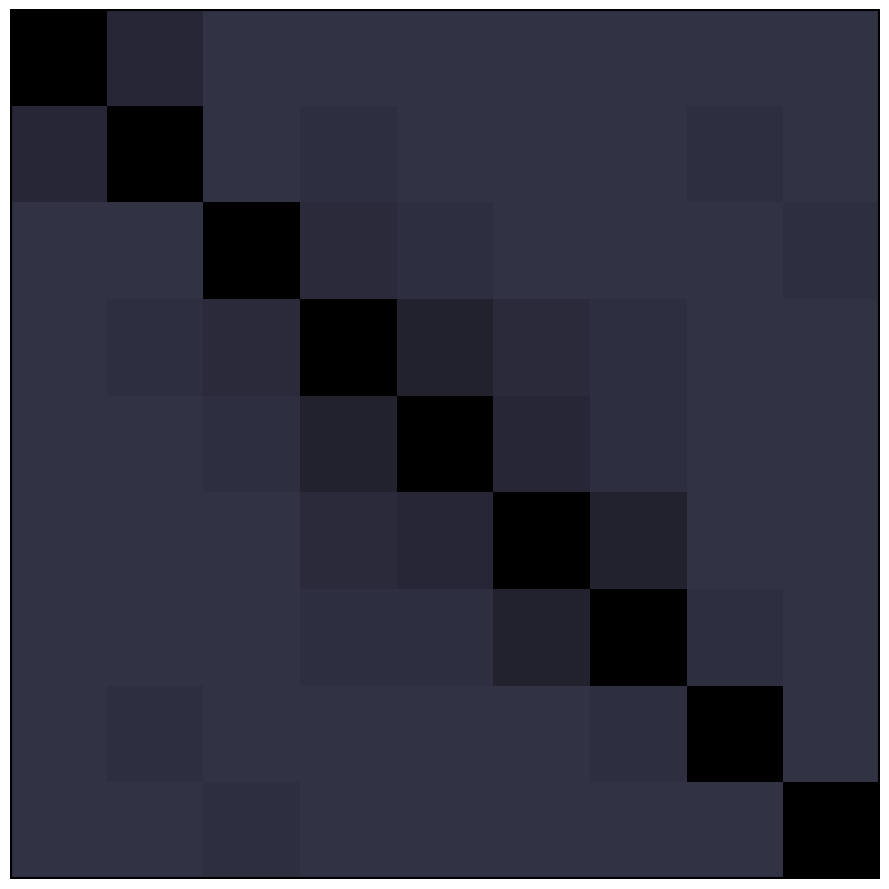

In [11]:
labels_2a = ["owl", "eagle", "flamingo", "swan", "duck", "chicken", "turkey", "dodo", "dove"]
no_species_2a = len(labels_2a)
S_2a = np.identity(n=no_species_2a)


S_2a[0][1:9] = (0.91, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88) # owl
S_2a[1][2:9] = (      0.88, 0.89, 0.88, 0.88, 0.88, 0.89, 0.88) # eagle
S_2a[2][3:9] = (            0.90, 0.89, 0.88, 0.88, 0.88, 0.89) # flamingo
S_2a[3][4:9] = (                  0.92, 0.90, 0.89, 0.88, 0.88) # swan
S_2a[4][5:9] = (                        0.91, 0.89, 0.88, 0.88) # duck
S_2a[5][6:9] = (                              0.92, 0.88, 0.88) # chicken
S_2a[6][7:9] = (                                    0.89, 0.88) # turkey
S_2a[7][8:9] = (                                          0.88) # dodo
                                                                # dove


S_2a = np.maximum( S_2a, S_2a.transpose() )
S_2a = pd.DataFrame({labels_2a[i]: S_2a[i] for i in range(no_species_2a)}, index=labels_2a)

# plot
similarity_matrix(S_2a, scale=2, outfile="fig2_community2a_birds_sim_matrix.pdf")

# save matrix
S_2a.to_csv("S_2a.csv", index=False)

In [12]:
S_2a

,owl,eagle,flamingo,swan,duck,chicken,turkey,dodo,dove
owl,1.00,0.91,0.88,0.88,0.88,0.88,0.88,0.88,0.88
eagle,0.91,1.00,0.88,0.89,0.88,0.88,0.88,0.89,0.88
flamingo,0.88,0.88,1.00,0.90,0.89,0.88,0.88,0.88,0.89
swan,0.88,0.89,0.90,1.00,0.92,0.90,0.89,0.88,0.88
duck,0.88,0.88,0.89,0.92,1.00,0.91,0.89,0.88,0.88
chicken,0.88,0.88,0.88,0.90,0.91,1.00,0.92,0.88,0.88
turkey,0.88,0.88,0.88,0.89,0.89,0.92,1.00,0.89,0.88
dodo,0.88,0.89,0.88,0.88,0.88,0.88,0.89,1.00,0.88
dove,0.88,0.88,0.89,0.88,0.88,0.88,0.88,0.88,1.00


In [13]:
counts_2a = pd.DataFrame({"Community 2a": [1, 1, 1, 1, 1, 1, 1, 1, 1]},
    index=labels_2a)
counts_2a.to_csv("counts_2a.csv", index=False)

In [14]:
counts_2a

,Community 2a
owl,1
eagle,1
flamingo,1
swan,1
duck,1
chicken,1
turkey,1
dodo,1
dove,1


In [38]:
metacommunity_2a = Metacommunity(counts_2a, similarity=S_2a)
metacommunity_2a.subcommunity_diversity(viewpoint=0, measure='alpha')

array([1.11173773])

In [16]:
metacommunity_2a.to_dataframe(viewpoint=0)

,community,viewpoint,alpha,rho,beta,gamma,normalized_alpha,normalized_rho,normalized_beta,rho_hat,beta_hat
0,metacommunity,0,1.111738,1.0,1.0,1.111738,1.111738,1.0,1.0,1.0,1.0
1,Community 2a,0,1.111738,1.0,1.0,1.111738,1.111738,1.0,1.0,1.0,1.0


### Community 2b (various animals)

Here, we care to manually make the similarities more realistic.

The species:

# 🐞🐝🦜🦋🐢🦞🦧🐠🦙

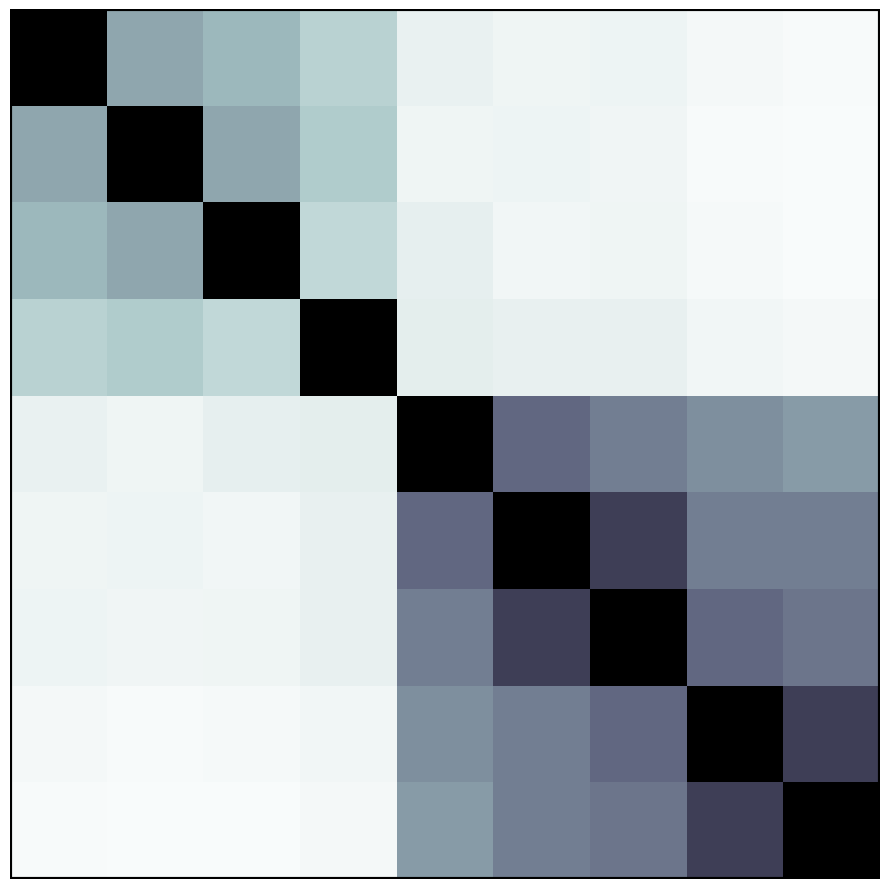

In [17]:
"""
invertebrates (insects -> arthropods) ->
fish -> reptile -> bird -> mammals

🐞🐝🦋🦞🐠🐢🦜🦙🦧
 0 1 2 3 4 5 6 7 8 
"""
# for D1Z calculation (done separately, though could import and run in this notebook, when code is ready)
labels_2b = ("ladybug", "bee", "butterfly", "lobster", "fish", "turtle", "parrot", "llama", "orangutan")

# create matrix: populate as i<j, and then symmetrize (values chosen to be consistent with Community 3's matrix)
no_species_2b = len(labels_2b)
S_2b = np.identity(n=no_species_2b)
S_2b[0][1:9] = (0.60, 0.55, 0.45, 0.25, 0.22, 0.23, 0.18, 0.16) # ladybug
S_2b[1][2:9] = (      0.60, 0.48, 0.22, 0.23, 0.21, 0.16, 0.14) # bee
S_2b[2][3:9] = (            0.42, 0.27, 0.20, 0.22, 0.17, 0.15) # butterfly
S_2b[3][4:9] = (                  0.28, 0.26, 0.26, 0.20, 0.18) # lobster
S_2b[4][5:9] = (                        0.75, 0.70, 0.66, 0.63) # fish
S_2b[5][6:9] = (                              0.85, 0.70, 0.70) # turtle
S_2b[6][7:9] = (                                    0.75, 0.72) # parrot
S_2b[7][8:9] = (                                          0.85) # llama
                                                             # orangutan
S_2b = np.maximum( S_2b, S_2b.transpose() )

S_2b = pd.DataFrame(
    {
        labels_2b[i]: S_2b[i] for i in range(no_species_2b)
    },
    index=labels_2b,
)

# plot
similarity_matrix(S_2b, scale=2, outfile="fig2_community2b_animals_sim_matrix.pdf")

# save matrix
S_2b.to_csv("S_2b.csv", index=False)

In [18]:
S_2b

,ladybug,bee,butterfly,lobster,fish,turtle,parrot,llama,orangutan
ladybug,1.00,0.60,0.55,0.45,0.25,0.22,0.23,0.18,0.16
bee,0.60,1.00,0.60,0.48,0.22,0.23,0.21,0.16,0.14
butterfly,0.55,0.60,1.00,0.42,0.27,0.20,0.22,0.17,0.15
lobster,0.45,0.48,0.42,1.00,0.28,0.26,0.26,0.20,0.18
fish,0.25,0.22,0.27,0.28,1.00,0.75,0.70,0.66,0.63
turtle,0.22,0.23,0.20,0.26,0.75,1.00,0.85,0.70,0.70
parrot,0.23,0.21,0.22,0.26,0.70,0.85,1.00,0.75,0.72
llama,0.18,0.16,0.17,0.20,0.66,0.70,0.75,1.00,0.85
orangutan,0.16,0.14,0.15,0.18,0.63,0.70,0.72,0.85,1.00


In [19]:
counts_2b = pd.DataFrame({"Community 2b": [1, 1, 1, 1, 1, 1, 1, 1, 1]},
    index=labels_2b)
counts_2b.to_csv("counts_2b.csv", index=False)

In [20]:
counts_2b

,Community 2b
ladybug,1
bee,1
butterfly,1
lobster,1
fish,1
turtle,1
parrot,1
llama,1
orangutan,1


In [39]:
metacommunity_2b = Metacommunity(counts_2b, similarity=S_2b)
metacommunity_2b.subcommunity_diversity(viewpoint=0, measure='alpha')

array([2.16312876])

In [22]:
metacommunity_2b.to_dataframe(viewpoint=0)

,community,viewpoint,alpha,rho,beta,gamma,normalized_alpha,normalized_rho,normalized_beta,rho_hat,beta_hat
0,metacommunity,0,2.163129,1.0,1.0,2.163129,2.163129,1.0,1.0,1.0,1.0
1,Community 2b,0,2.163129,1.0,1.0,2.163129,2.163129,1.0,1.0,1.0,1.0


## Figure 3: Illustrates beta diversity

In [23]:
# each phylum its own subcommunity; expect low representativeness
subcommunity_2b_1 = ("🐞", "🐝", "🦋", "🦞")
subcommunity_2b_1 = ("🐠", "🐢", "🦜", "🦙", "🦧")

# each subcommunity has memers from both phyla; expect high representativeness
subcommunity_2b_3 = ("🐞",       "🦋",       "🐠",       "🦜",       "🦧")
subcommunity_2b_4 = (      "🐝",       "🦞",       "🐢",       "🦙",     )

In [24]:
counts_2b_1 = pd.DataFrame({"Subcommunity_2b_1": [1, 1, 1, 1, 0, 0, 0, 0, 0],
                         "Subcommunity_2b_2": [0, 0, 0, 0, 1, 1, 1, 1, 1]}, index=labels_2b)
counts_2b_1.to_csv("counts_2b_1.csv", index=False)

In [25]:
counts_2b_1

,Subcommunity_2b_1,Subcommunity_2b_2
ladybug,1,0
bee,1,0
butterfly,1,0
lobster,1,0
fish,0,1
turtle,0,1
parrot,0,1
llama,0,1
orangutan,0,1


In [26]:
metacommunity_2b_1 = Metacommunity(counts_2b_1, similarity=S_2b)
metacommunity_2b_1.subcommunity_diversity(viewpoint=0, measure='rho_hat')

array([0.41333318, 0.21398288])

In [27]:
metacommunity_2b_1.subcommunity_diversity(viewpoint=0, measure='alpha')

array([3.53787004, 2.29512853])

In [32]:
metacommunity_2b_1.to_dataframe(viewpoint=[0,1,np.inf])

,community,viewpoint,alpha,rho,beta,gamma,normalized_alpha,normalized_rho,normalized_beta,rho_hat,beta_hat
0,metacommunity,0.0,2.847458,1.302583,0.772096,2.163129,1.407212,0.653863,1.531282,0.302583,0.544192
1,Subcommunity_2b_1,0.0,3.537870,1.413333,0.707547,2.502149,1.572387,0.628148,1.591981,0.413333,0.415094
2,Subcommunity_2b_2,0.0,2.295129,1.213983,0.823735,1.891912,1.275071,0.674435,1.482723,0.213983,0.647470
3,metacommunity,1.0,2.779824,1.298064,0.770378,2.141516,1.398536,0.653059,1.531255,0.285932,0.532352
4,Subcommunity_2b_1,1.0,3.533582,1.412335,0.708047,2.501943,1.570481,0.627705,1.593106,0.412335,0.416094
5,Subcommunity_2b_2,1.0,2.294347,1.213340,0.824171,1.890934,1.274637,0.674078,1.483508,0.213340,0.648342
6,metacommunity,inf,2.238806,1.161538,0.736264,1.821862,1.243781,0.603648,1.549669,0.161538,0.472527
7,Subcommunity_2b_1,inf,3.358209,1.358209,0.736264,2.472527,1.492537,0.603648,1.656593,0.358209,0.472527
8,Subcommunity_2b_2,inf,2.238806,1.161538,0.860927,1.821862,1.243781,0.645299,1.549669,0.161538,0.721854


In [28]:
counts_2b_2 = pd.DataFrame({"Subcommunity_3": [1, 0, 1, 0, 1, 0, 1, 0, 1],
                         "Subcommunity_4": [0, 1, 0, 1, 0, 1, 0, 1, 0]}, index=labels_2b)
counts_2b_2.to_csv("counts_2b_2.csv", index=False)

In [29]:
counts_2b_2

,Subcommunity_3,Subcommunity_4
ladybug,1,0
bee,0,1
butterfly,1,0
lobster,0,1
fish,1,0
turtle,0,1
parrot,1,0
llama,0,1
orangutan,1,0


In [30]:
metacommunity_2b_2 = Metacommunity(counts_2b_2, similarity=S_2b)
metacommunity_2b_2.subcommunity_diversity(viewpoint=0, measure='rho_hat')

array([0.67824819, 1.06877778])

In [33]:
metacommunity_2b_2.to_dataframe(viewpoint=[0,1,np.inf])

/Users/arnaoutlab/src/diversity/src/diversity/utilities.py:103: RuntimeWarning: invalid value encountered in power
  power(items, weights, where=weight_is_nonzero),


,community,viewpoint,alpha,rho,beta,gamma,normalized_alpha,normalized_rho,normalized_beta,rho_hat,beta_hat
0,metacommunity,0.0,3.980772,1.851817,0.545867,2.163129,1.990176,0.926625,1.079237,0.851817,0.091735
1,Subcommunity_3,0.0,3.579284,1.678248,0.595859,2.137174,1.988491,0.932360,1.072547,0.678248,0.191719
2,Subcommunity_4,0.0,4.482633,2.068778,0.483377,2.195573,1.992281,0.919457,1.087599,1.068778,-0.033246
3,metacommunity,1.0,3.936237,1.838061,0.544052,2.141516,1.980330,0.924733,1.081393,0.826880,NaN
4,Subcommunity_3,1.0,3.552574,1.677969,0.595959,2.117187,1.973652,0.932205,1.072725,0.677969,0.191917
5,Subcommunity_4,1.0,4.474596,2.059823,0.485479,2.172320,1.988709,0.915477,1.092327,1.059823,-0.029043
6,metacommunity,inf,3.135889,1.634703,0.549575,1.821862,1.742160,0.808706,1.101117,0.634703,0.099150
7,Subcommunity_3,inf,3.135889,1.634703,0.611732,1.821862,1.742160,0.908168,1.101117,0.634703,0.223464
8,Subcommunity_4,inf,4.109589,1.819588,0.549575,1.832994,1.826484,0.808706,1.236544,0.819588,0.099150
